## Pr√©paration du dataset :

In [73]:
# Chargement des biblioth√®ques n√©cessaires
# NumPy et Pandas pour la manipulation des donn√©es
# Matplotlib et Seaborn pour la visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#Chargement des donn√©es
# Nous utilisons la fonction read_csv de Pandas pour charger le fichier CSV.
# Le d√©limiteur ';' est sp√©cifi√© pour s'assurer que les colonnes sont correctement lues.
dataset_path = "colon_cancer.csv" 
df = pd.read_csv(dataset_path , delimiter = ';')

In [75]:
# Affichage des premi√®res lignes du dataset pour une premi√®re v√©rification de la structure.
df.head()

id_sample     ADH1C    DHRS11      UGP2    SLC7A5      CTSS  \
0  EPSM-COLON-0001  9.199944  6.090054  7.062512  3.864253  7.869368   
1  EPSM-COLON-0002  7.767618  6.027985  6.318818  3.069581  6.410334   
2  EPSM-COLON-0003  7.918904  5.885948  6.917742  3.188257  7.915549   
3  EPSM-COLON-0004  9.053553  6.027985  7.081085  2.357523  5.657726   
4  EPSM-COLON-0005  6.027822  5.791257  5.937685  4.137667  5.818999   

        DAO    NIBAN1    PRUNE2     FOXF2  ...     BSPRY     CDHR2    ERRFI1  \
0  8.465133  1.174665  0.975086  3.028995  ...  5.528372  3.500730  2.893760   
1  8.159814  5.959414  1.625518  2.984629  ...  5.671788  4.658790  4.715374   
2  8.004194  1.560386  2.379909  2.929762  ...  4.596079  5.649376  4.047899   
3  8.004194  3.548988  3.260031  3.313829  ...  4.135061  5.437107  4.537381   
4  8.056067  3.307945  5.208874  4.191695  ...  3.674043  6.286182  4.715374   

      CLIC5      PLLP       GAL     CRYL1      YBX2   ANGPTL4  tissue_status  
0  5.130743  1.485110  1.830484  6.379933  3.919293  3.031413         normal  
1  5.438104  2.131466  2.097157  6.863173  0.322829  3.978531         normal  
2  6.580938  1.447209  3.890943  6.209704  3.274407  3.714491         normal  
3  4.615263  1.004454  1.840902  6.774063  3.320525  3.080796         normal  
4  4.432410  0.159195  3.506561  6.150297  0.461184  5.140305         normal  

[5 rows x 62 columns]

In [76]:
# V√©rification des valeurs manquantes
# Cette √©tape est cruciale pour s'assurer que les donn√©es sont compl√®tes.
# Les valeurs manquantes peuvent impacter les performances des mod√®les de classification.
df.isna().sum()

id_sample        0
ADH1C            0
DHRS11           0
UGP2             0
SLC7A5           0
                ..
GAL              0
CRYL1            0
YBX2             0
ANGPTL4          0
tissue_status    0
Length: 62, dtype: int64

In [77]:
# Suppression de la colonne 'id_sample'
# Cette colonne est probablement un identifiant unique et n'apporte pas d'information pertinente pour la classification.
df.drop(columns=["id_sample"], inplace=True)

# V√©rification apr√®s suppression
print(df.head())  


      ADH1C    DHRS11      UGP2    SLC7A5      CTSS       DAO    NIBAN1  \
0  9.199944  6.090054  7.062512  3.864253  7.869368  8.465133  1.174665   
1  7.767618  6.027985  6.318818  3.069581  6.410334  8.159814  5.959414   
2  7.918904  5.885948  6.917742  3.188257  7.915549  8.004194  1.560386   
3  9.053553  6.027985  7.081085  2.357523  5.657726  8.004194  3.548988   
4  6.027822  5.791257  5.937685  4.137667  5.818999  8.056067  3.307945   

     PRUNE2     FOXF2    TENT5C  ...     BSPRY     CDHR2    ERRFI1     CLIC5  \
0  0.975086  3.028995  6.350919  ...  5.528372  3.500730  2.893760  5.130743   
1  1.625518  2.984629  4.686086  ...  5.671788  4.658790  4.715374  5.438104   
2  2.379909  2.929762  4.281126  ...  4.596079  5.649376  4.047899  6.580938   
3  3.260031  3.313829  4.821072  ...  4.135061  5.437107  4.537381  4.615263   
4  5.208874  4.191695  5.181036  ...  3.674043  6.286182  4.715374  4.432410   

       PLLP       GAL     CRYL1      YBX2   ANGPTL4  tissue_status  

In [78]:
# S√©paration des features et de la variable cible
X = df.drop(columns=['tissue_status'])
y = df['tissue_status'].map({'normal': 0, 'tumoral': 1})

In [79]:
# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
# 80% des donn√©es sont utilis√©es pour l'entra√Ænement, 20% pour le test.X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploration des donn√©es : 

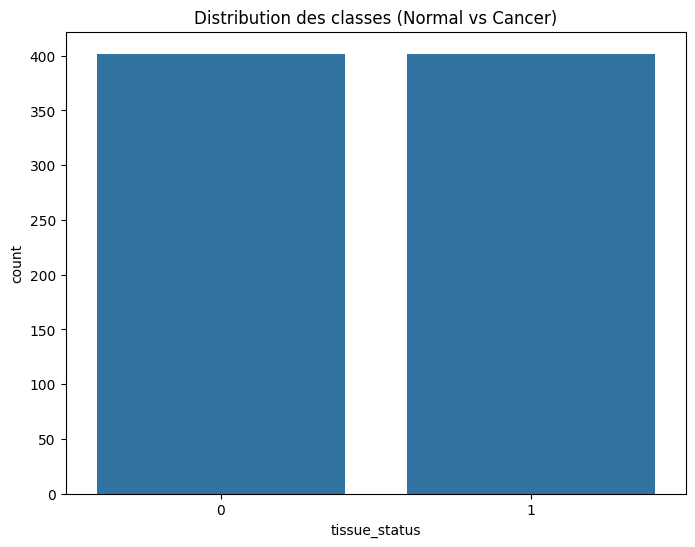

In [80]:
# Visualisation des distributions des classes
# Cette √©tape permet de v√©rifier si le dataset est √©quilibr√© ou d√©s√©quilibr√©.
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Distribution des classes (Normal vs Cancer)")
plt.show()

Le dataset est √©quilibr√©, ce qui est une bonne nouvelle pour l'entra√Ænement des mod√®les de classification.

In [81]:
df.describe()

ADH1C      DHRS11        UGP2      SLC7A5        CTSS         DAO  \
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000   
mean     5.588943    4.354817    5.557694    4.513570    6.717535    7.218184   
std      2.889901    1.431179    1.150565    1.614450    1.077821    1.411969   
min      0.610504    1.427079    2.027201    1.685024    3.668691    1.164886   
25%      3.174250    3.118844    4.611060    3.030022    6.065937    6.241714   
50%      5.467024    4.125990    5.412204    4.382953    6.762908    7.578782   
75%      8.444756    5.696566    6.556969    5.918848    7.485487    8.263561   
max     10.263846    7.022241    7.571114    8.059430    8.990703   10.079135   

           NIBAN1      PRUNE2       FOXF2      TENT5C  ...       SYTL2  \
count  804.000000  804.000000  804.000000  804.000000  ...  804.000000   
mean     2.737937    2.806573    3.064394    3.658318  ...    3.599294   
std      1.466906    1.243826    1.191486    1.258059  ...    1.054504   
min      0.716737    0.368200    0.610504    0.858074  ...    1.286220   
25%      1.550382    1.864561    2.198244    2.655091  ...    2.878356   
50%      2.297732    2.741509    2.900393    3.605686  ...    3.613342   
75%      3.669509    3.574304    3.752899    4.686086  ...    4.417632   
max      6.682541    6.591924    6.276628    6.350919  ...    5.713776   

            BSPRY       CDHR2      ERRFI1       CLIC5        PLLP         GAL  \
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000   
mean     4.682718    4.225014    4.575397    4.097244    1.823268    2.822931   
std      0.917027    1.656088    0.859138    1.276589    0.721587    1.338349   
min      1.868389    0.637047    2.250347    1.015235    0.118945    0.610504   
25%      4.349295    2.921069    3.958903    3.131267    1.337715    1.840902   
50%      4.869313    4.116251    4.537381    3.975276    1.689671    2.591044   
75%      5.249372    5.507864    5.070072    5.118110    2.211967    3.661012   
max      7.029946    9.045672    7.647284    7.129499    4.763212    7.545757   

            CRYL1        YBX2     ANGPTL4  
count  804.000000  804.000000  804.000000  
mean     6.096634    2.801603    2.596452  
std      0.840122    1.011971    1.000962  
min      2.031471    0.000000    0.757246  
25%      5.489589    2.277491    1.824823  
50%      6.150297    2.905605    2.442378  
75%      6.728052    3.505721    3.139738  
max      8.723941    5.169059    6.493643  

[8 rows x 60 columns]

Certaines variables ont un minimum de 0, ce qui signifie que certains g√®nes ne sont pas du tout exprim√©s dans certains √©chantillons.

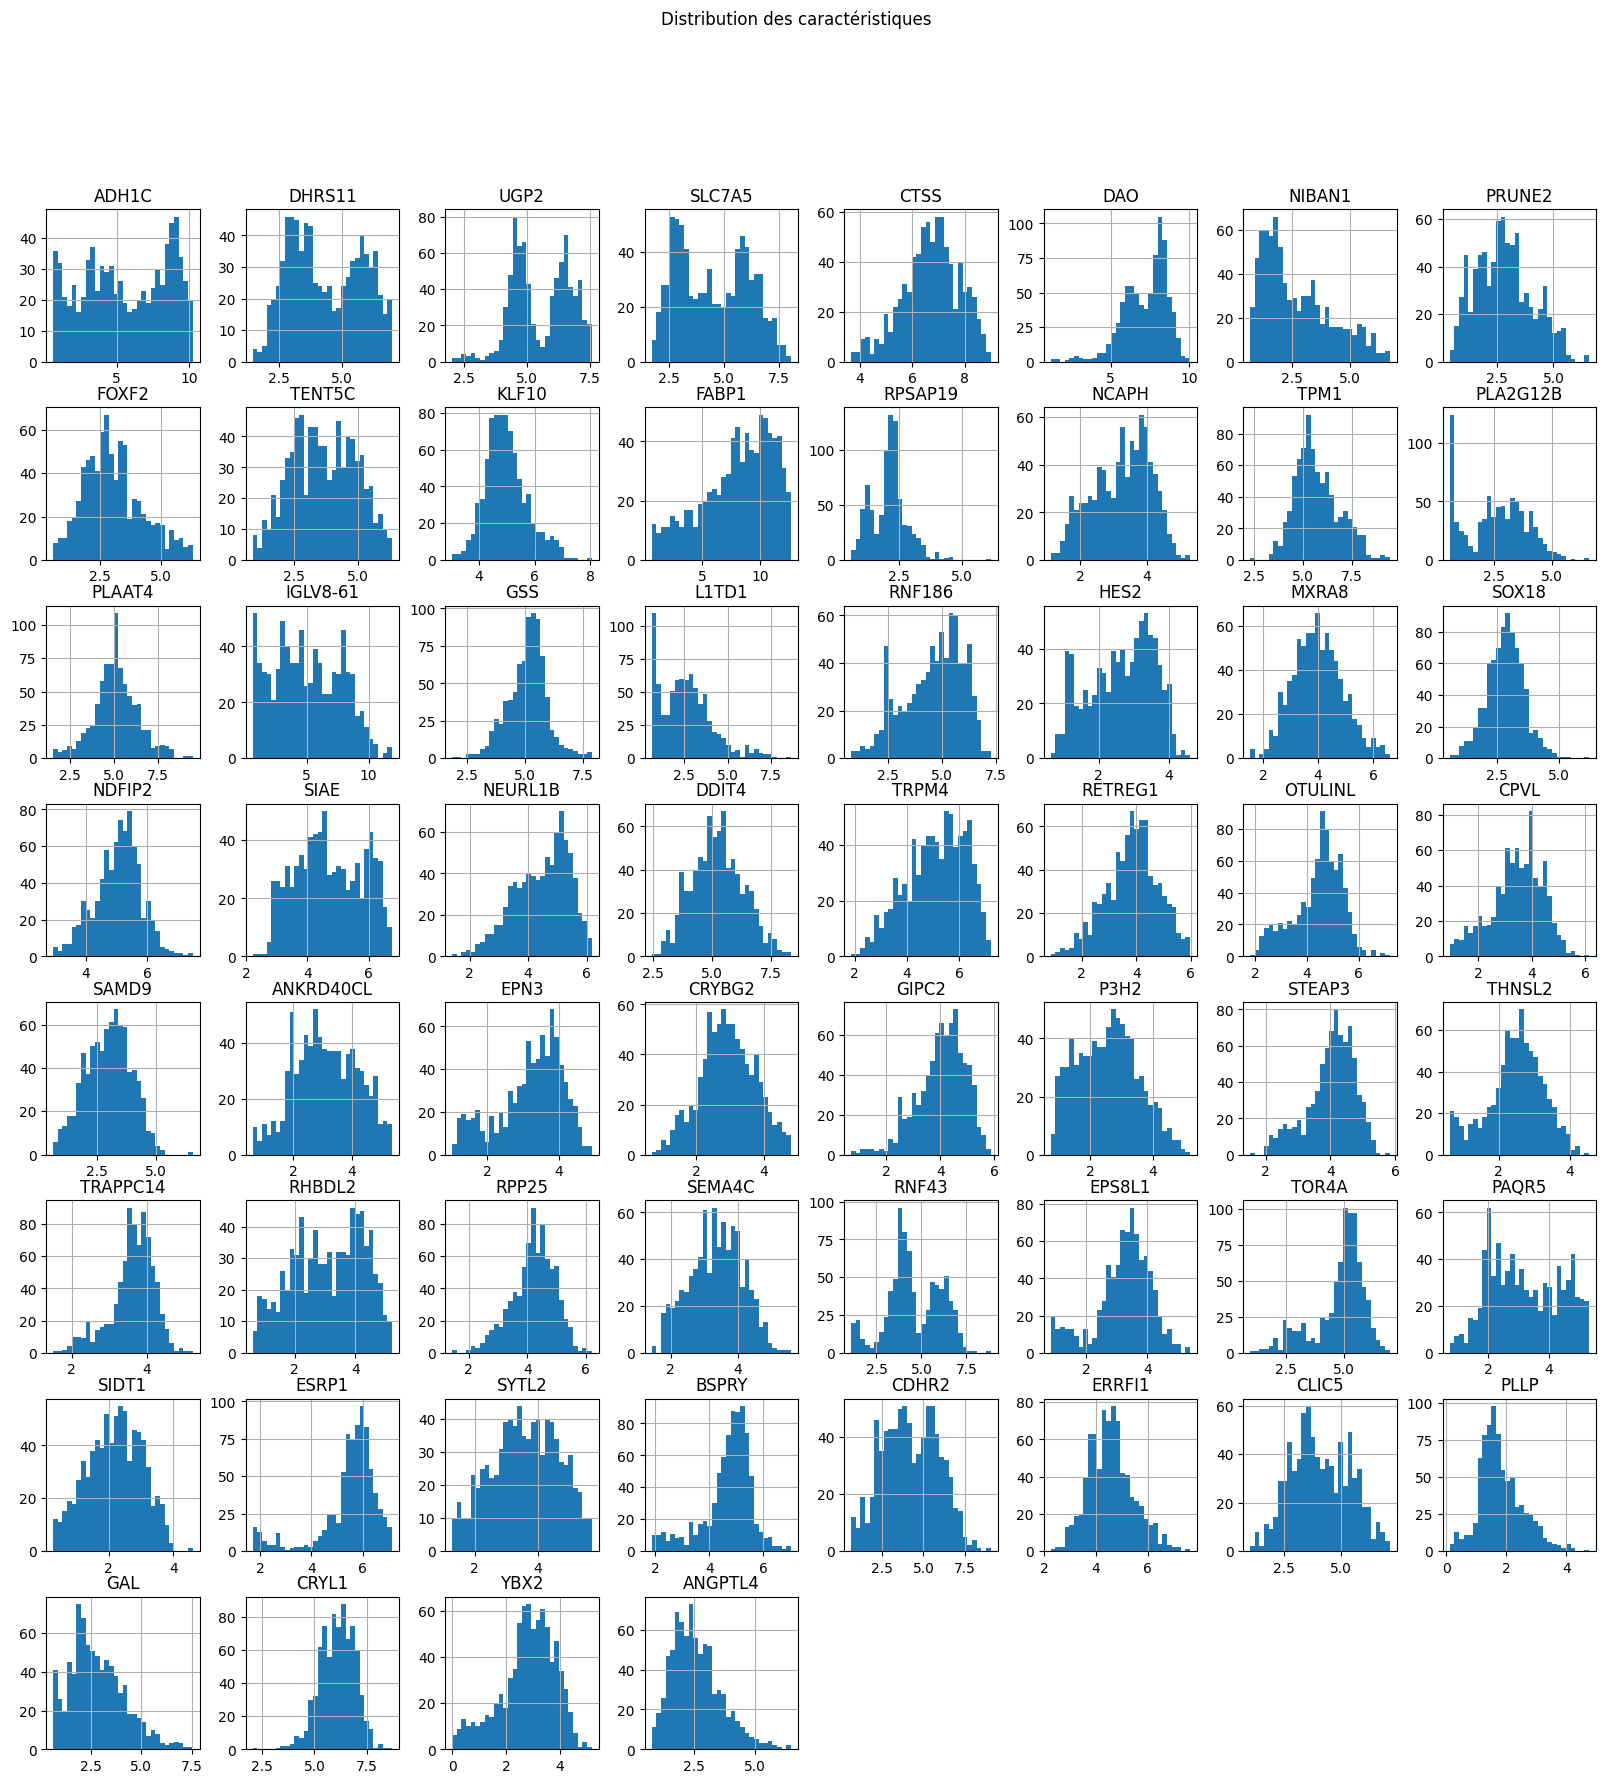

In [82]:
df.hist(figsize=(20, 20), bins=30)
plt.suptitle("Distribution des caract√©ristiques")
plt.show()

histogramme permet de visualiser la r√©partition des valeurs des diff√©rentes caract√©ristiques (g√®nes).

Certaines variables sont bien √©quilibr√©es et peuvent √™tre directement utilis√©es dans les mod√®les, tandis que d'autres contiennent des valeurs aberrantes qui pourraient n√©cessiter un traitement avant l'entra√Ænement du mod√®le.

## Application des algorithmes de classification : 

Logistic Regression Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



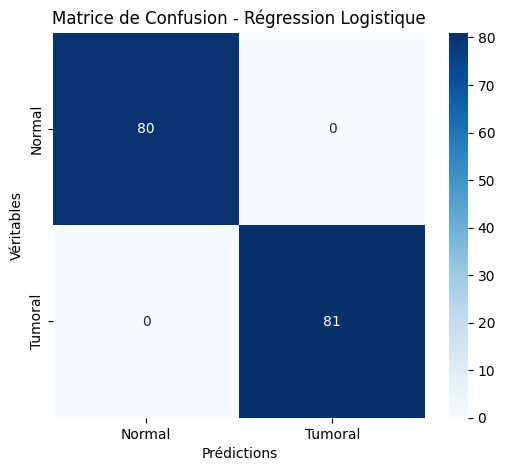

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate performance
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Calculer la matrice de confusion avant de l'afficher
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# 1. Matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Tumoral'], yticklabels=['Normal', 'Tumoral'])
plt.title("Matrice de Confusion - R√©gression Logistique")
plt.xlabel('Pr√©dictions')
plt.ylabel('V√©ritables')
plt.show()


Le mod√®le de r√©gression logistique a obtenu une pr√©cision parfaite de 1.0000 sur l‚Äôensemble de test.

Le rapport de classification montre que le mod√®le a obtenu des scores parfaits pour la pr√©cision, le rappel et le F1-score pour les deux classes, ce qui signifie qu'il n'a fait aucune erreur.

La matrice de confusion confirme que toutes les pr√©dictions √©taient correctes (pas de faux positifs ni de faux n√©gatifs).

         Gene  Coefficient
44      RNF43     0.945012
3      SLC7A5     0.876286
2        UGP2    -0.718846
5         DAO    -0.672351
26    NEURL1B    -0.647466
13      NCAPH     0.536046
8       FOXF2    -0.531378
27      DDIT4     0.511566
54      CLIC5    -0.467667
0       ADH1C    -0.442681
33  ANKRD40CL    -0.439784
47      PAQR5    -0.432132
6      NIBAN1    -0.411950
1      DHRS11    -0.402027
16     PLAAT4    -0.387788
9      TENT5C    -0.373778
57      CRYL1    -0.362022
31       CPVL    -0.360299
45     EPS8L1     0.356522
23      SOX18    -0.346477


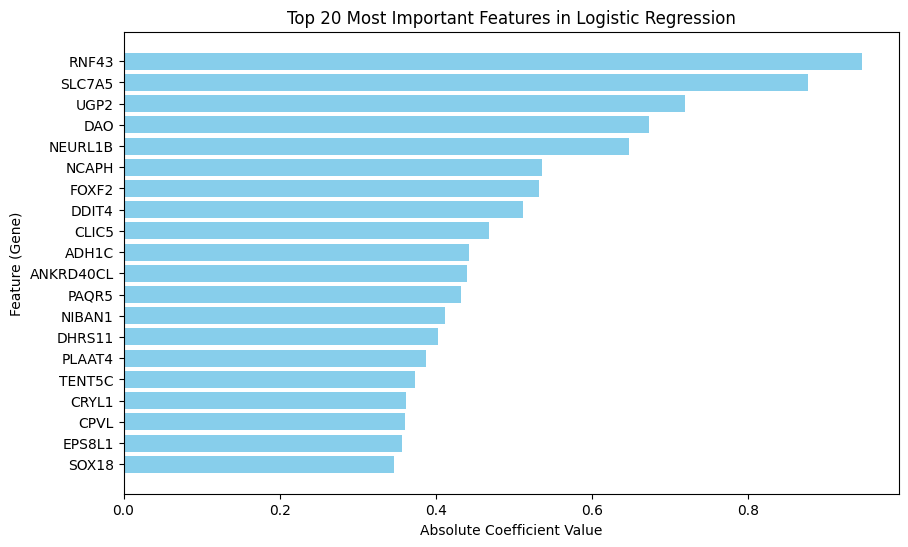

In [84]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Encodage de la target
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Mod√®le
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_encoded)

# R√©cup√©rer l‚Äôimportance des coefficients
coefficients = model.coef_[0]

# Cr√©er un DataFrame pour afficher l‚Äôimportance par g√®ne
importance_df = pd.DataFrame({
    'Gene': X_train.columns,
    'Coefficient': coefficients
})

# Trier par importance absolue
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Afficher les g√®nes les plus influents
print(importance_df[['Gene', 'Coefficient']].head(20))  # Top 10 g√®nes# Display the top 20 most important features

# Visualize the Top 20 Features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Gene'][:20], importance_df['Abs_Coefficient'][:20], color='skyblue')
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature (Gene)")
plt.title("Top 20 Most Important Features in Logistic Regression")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()



La sortie montre les 20 g√®nes les plus influents (avec leur coefficient), dont certains sont positifs (indiquant qu'ils augmentent la probabilit√© d'une classe) et d'autres sont n√©gatifs (indiquant qu'ils r√©duisent la probabilit√©).

Le graphique final aide √† visualiser l'importance de ces g√®nes dans la pr√©diction du mod√®le de r√©gression logistique.

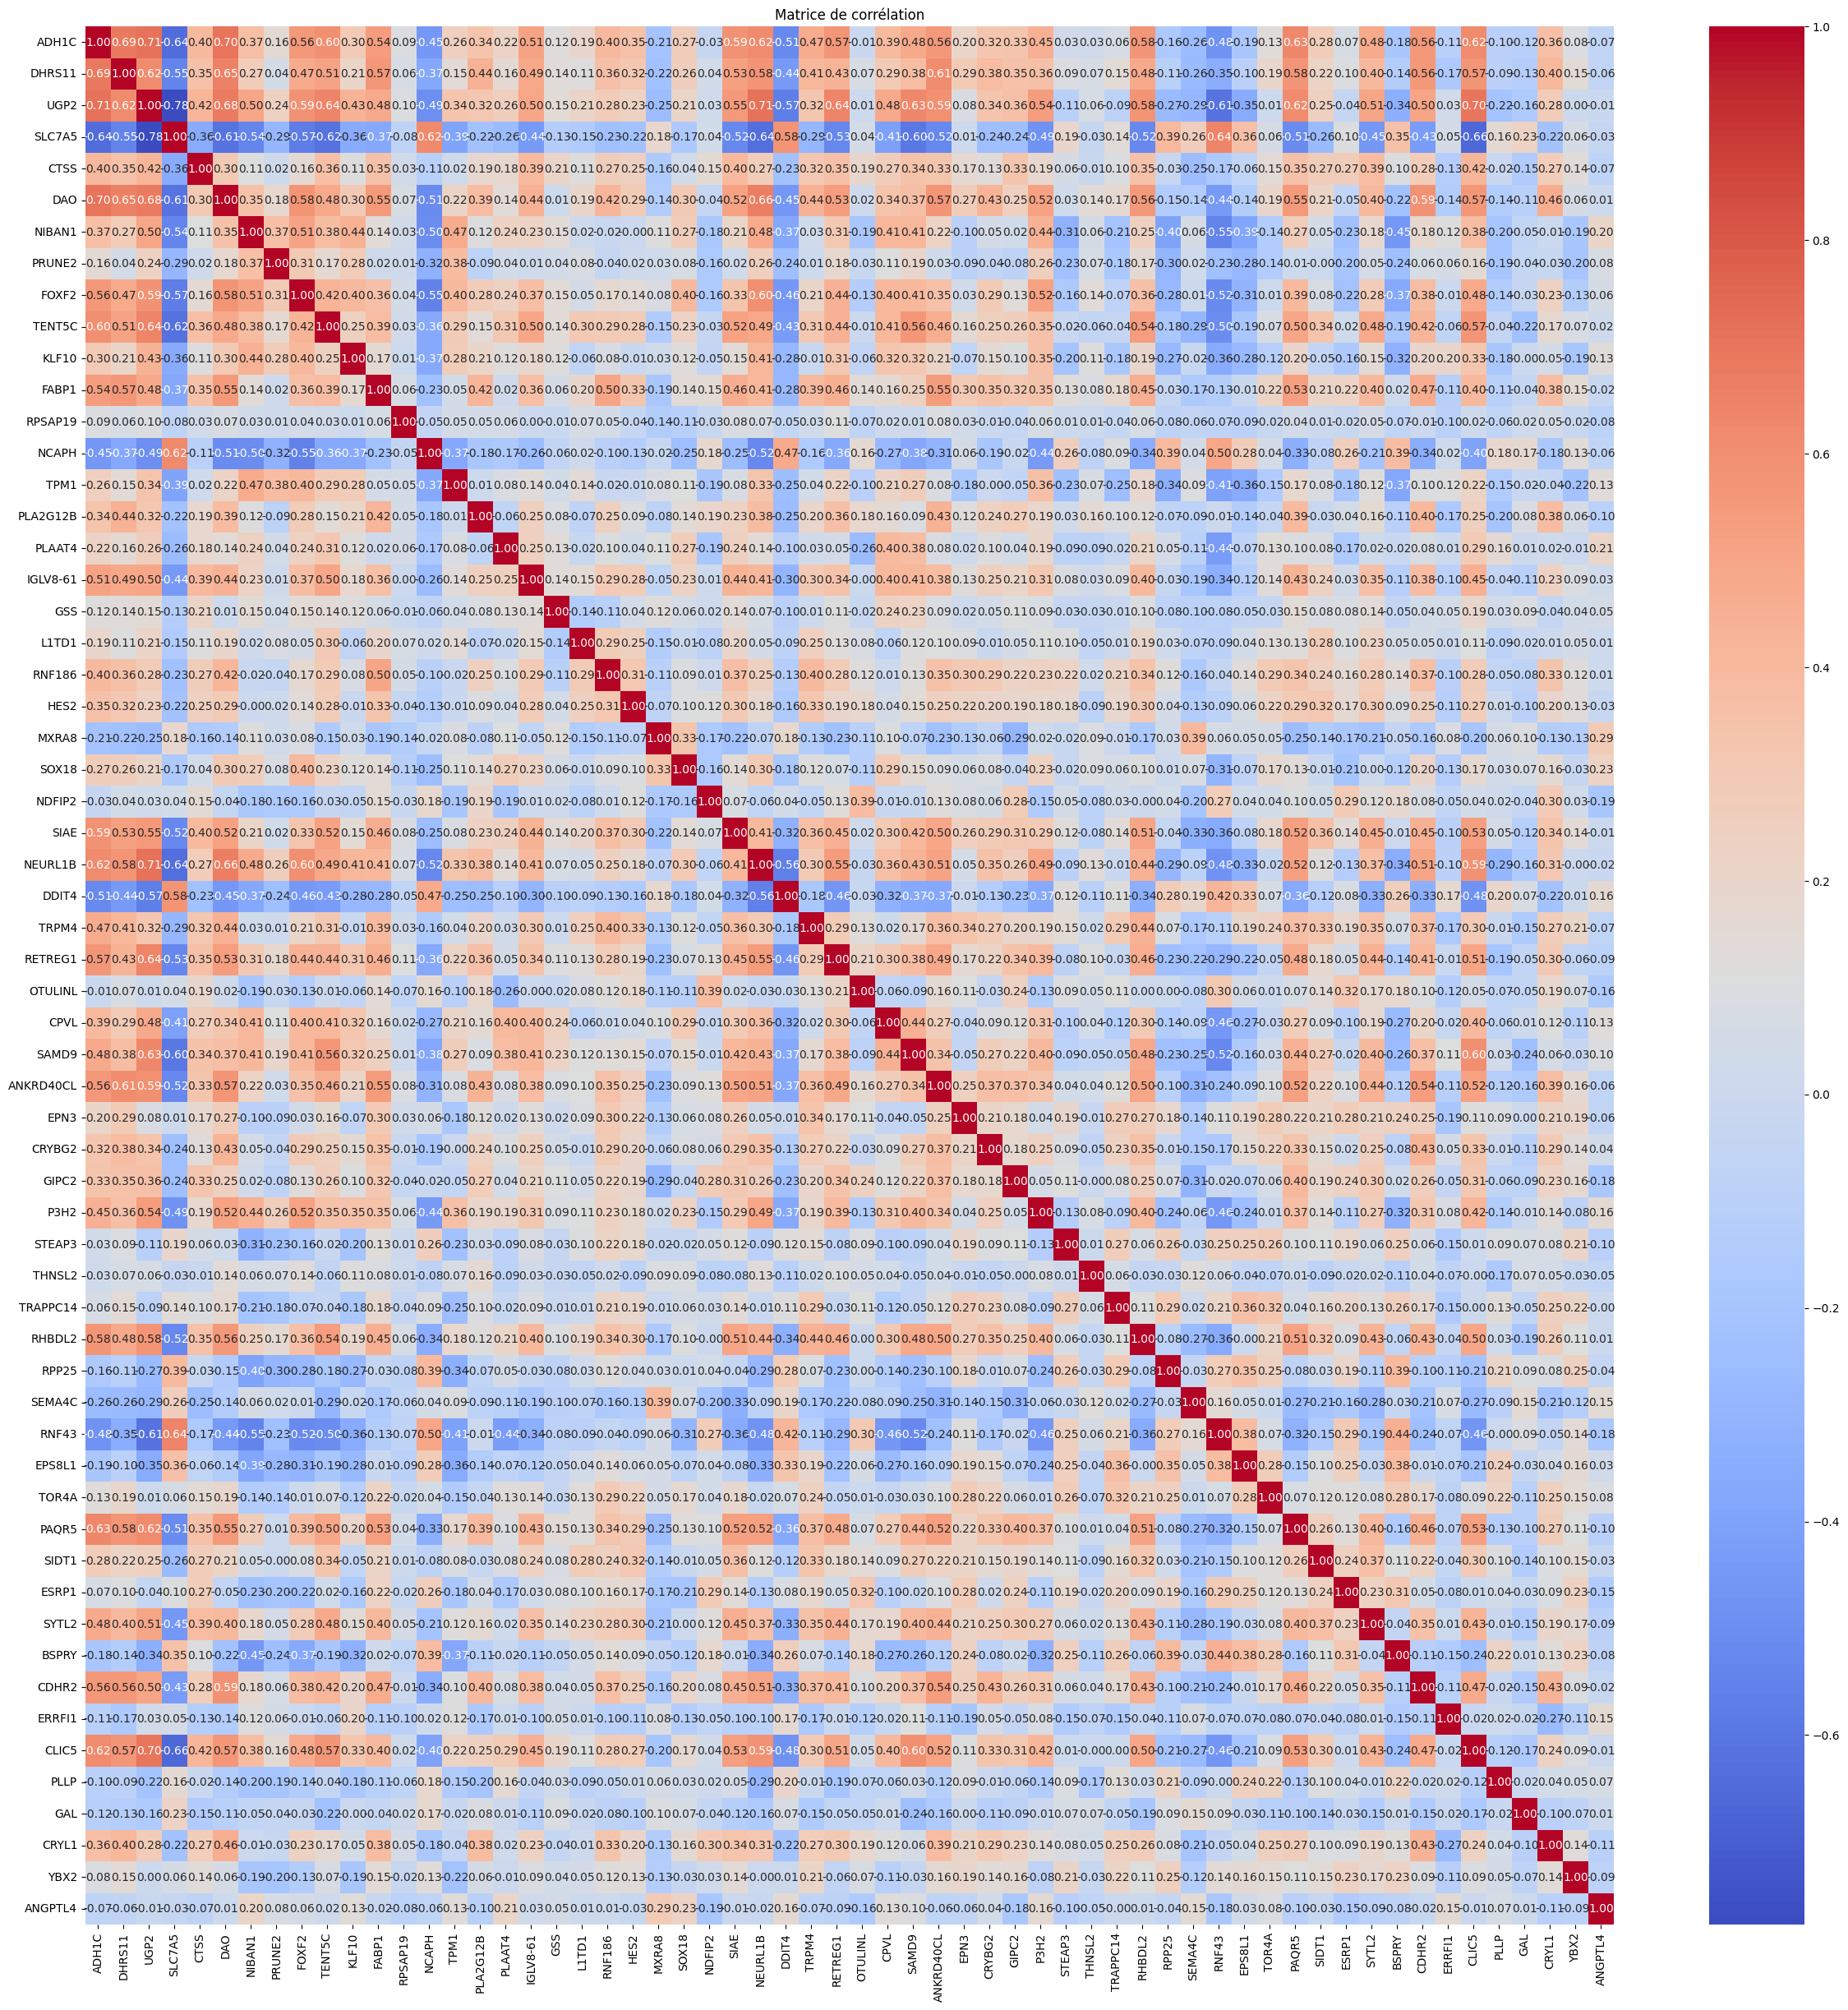

In [85]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.drop(columns=['tissue_status']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corr√©lation")
plt.show()

Chaque cellule de la matrice montre la valeur de la corr√©lation entre deux variables. Les couleurs de la heatmap permettent de visualiser rapidement la force de ces corr√©lations :

Les zones rouges correspondent √† des corr√©lations positives fortes.

Les zones bleues correspondent √† des corr√©lations n√©gatives fortes.

Les zones proches du blanc indiquent une faible ou aucune corr√©lation.


Logistic Regression Results using RNF43 gene:
--------------------------------------------
Accuracy: 0.8447

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        81
           1       0.91      0.76      0.83        80

    accuracy                           0.84       161
   macro avg       0.85      0.84      0.84       161
weighted avg       0.85      0.84      0.84       161



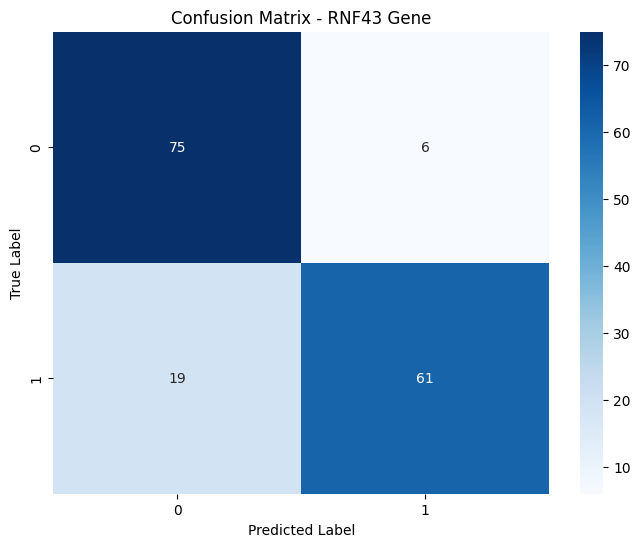

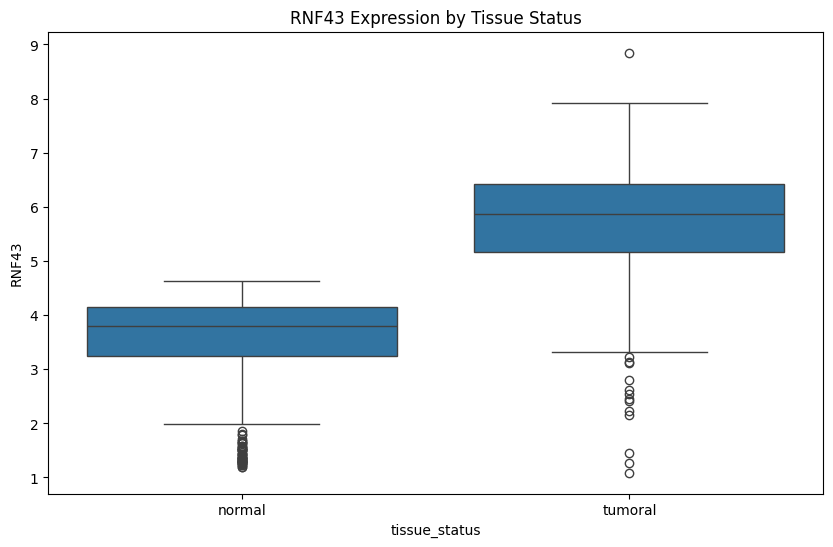

In [86]:

# Extract RNF43 feature and target variable
X = df[['RNF43']]  # Using only RNF43 gene
y = df['tissue_status']  # Target variable

# Convert target to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print results
print("\nLogistic Regression Results using RNF43 gene:")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RNF43 Gene')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot RNF43 distribution by tissue status
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tissue_status'], y=df['RNF43'])
plt.title('RNF43 Expression by Tissue Status')
plt.show()

Le mod√®le de r√©gression logistique montre une bonne capacit√© de discrimination entre les classes √† partir du g√®ne RNF43 avec une performance relativement bonne avec 84.47% d'exactitude.

Le rapports de classification montre que le mod√®le est plus pr√©cis pour pr√©dire la classe tumoral (1), mais a un meilleur rappel pour la classe normal (0).

La matrice de confusion montre quelques erreurs de pr√©diction, mais dans l'ensemble, le mod√®le semble bien fonctionner.

Le boxplot permet de v√©rifier visuellement si le g√®ne RNF43 pourrait √™tre un bon pr√©dicteur pour la t√¢che, en montrant si ses valeurs sont bien s√©par√©es entre les diff√©rentes classes de tissu.


Logistic Regression Results using SLC7A5 gene:
--------------------------------------------
Accuracy: 0.9317

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.95      0.91      0.93        80

    accuracy                           0.93       161
   macro avg       0.93      0.93      0.93       161
weighted avg       0.93      0.93      0.93       161



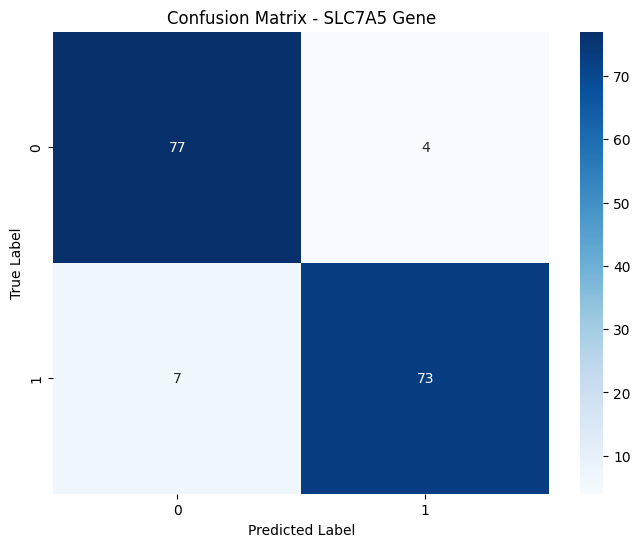

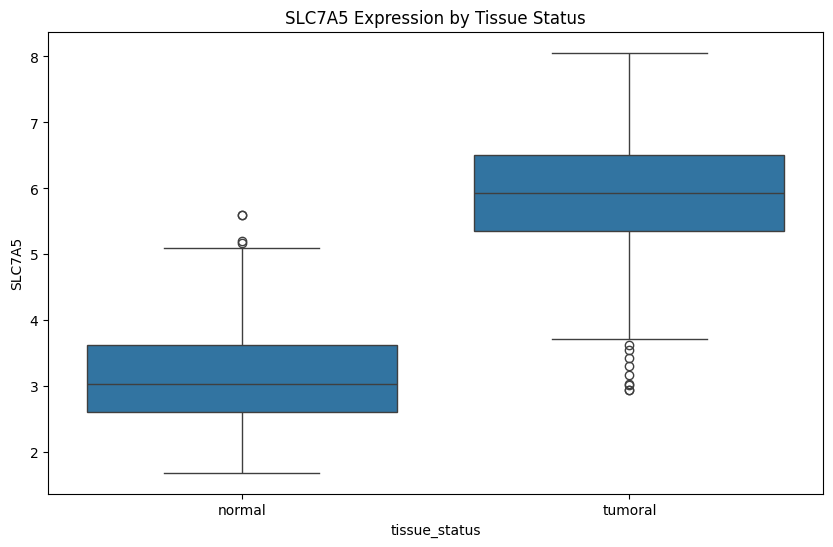

In [21]:
# Analysis for SLC7A5 gene
X = df[['RNF43','SLC7A5']]  # Using only SLC7A5 gene
y = df['tissue_status']  # Target variable

# Convert target to numeric
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print results
print("\nLogistic Regression Results using SLC7A5 gene:")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SLC7A5 Gene')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot SLC7A5 distribution by tissue status
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tissue_status'], y=df['SLC7A5'])
plt.title('SLC7A5 Expression by Tissue Status')
plt.show()

le mod√®le avec RNF43 et SLC7A5 offre une performance solide pour pr√©dire tissue_statusavec une tr√®s bonne performance avec une exactitude de 93.17%.

Le rapport de classification montre une pr√©cision et un rappel √©lev√©s pour les deux classes, avec un F1-score √©quilibr√© de 93%.

Le mod√®le semble bien diff√©rencier les classes normal et tumoral, et la matrice de confusion montre que les erreurs de pr√©diction sont relativement faibles.

Le boxplot de SLC7A5 montre probablement une bonne s√©paration entre les classes, ce qui soutient l'id√©e que ce g√®ne contribue de mani√®re significative √† la t√¢che de classification.


Logistic Regression Results using UGP2 gene:
--------------------------------------------
Accuracy: 0.9317

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.95      0.91      0.93        80

    accuracy                           0.93       161
   macro avg       0.93      0.93      0.93       161
weighted avg       0.93      0.93      0.93       161



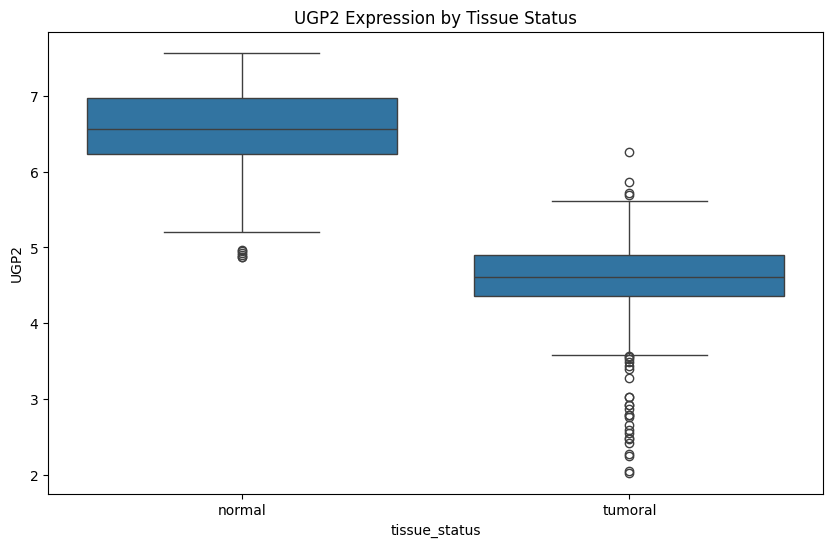

In [22]:

# Update feature selection to include UGP2
X = df[['RNF43', 'SLC7A5', 'UGP2']]  # Using all three genes
y = df['tissue_status']  # Target variable

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print results
print("\nLogistic Regression Results using UGP2 gene:")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# After the existing visualizations, add a boxplot for UGP2
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tissue_status'], y=df['UGP2'])
plt.title('UGP2 Expression by Tissue Status')
plt.show()


Logistic Regression Results using all four genes (RNF43, SLC7A5, UGP2, DAO):
--------------------------------------------
Accuracy: 0.9938

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       0.99      1.00      0.99        80

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



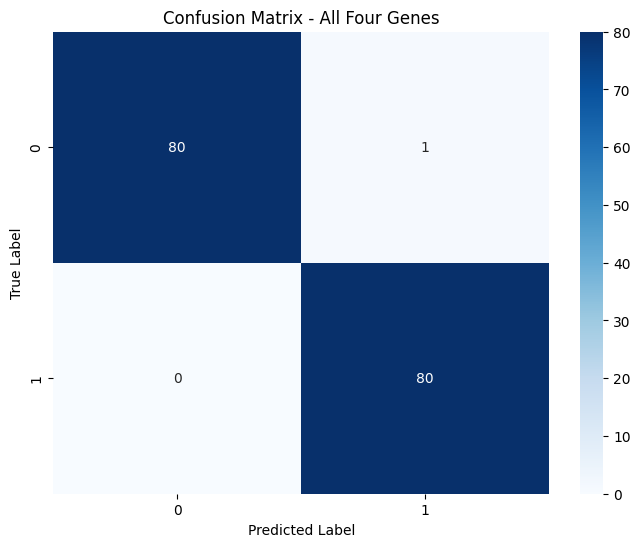

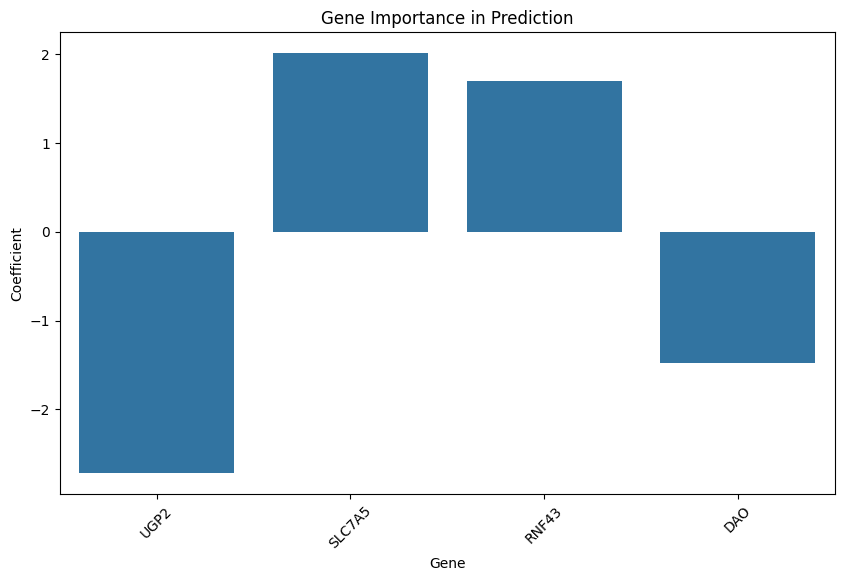

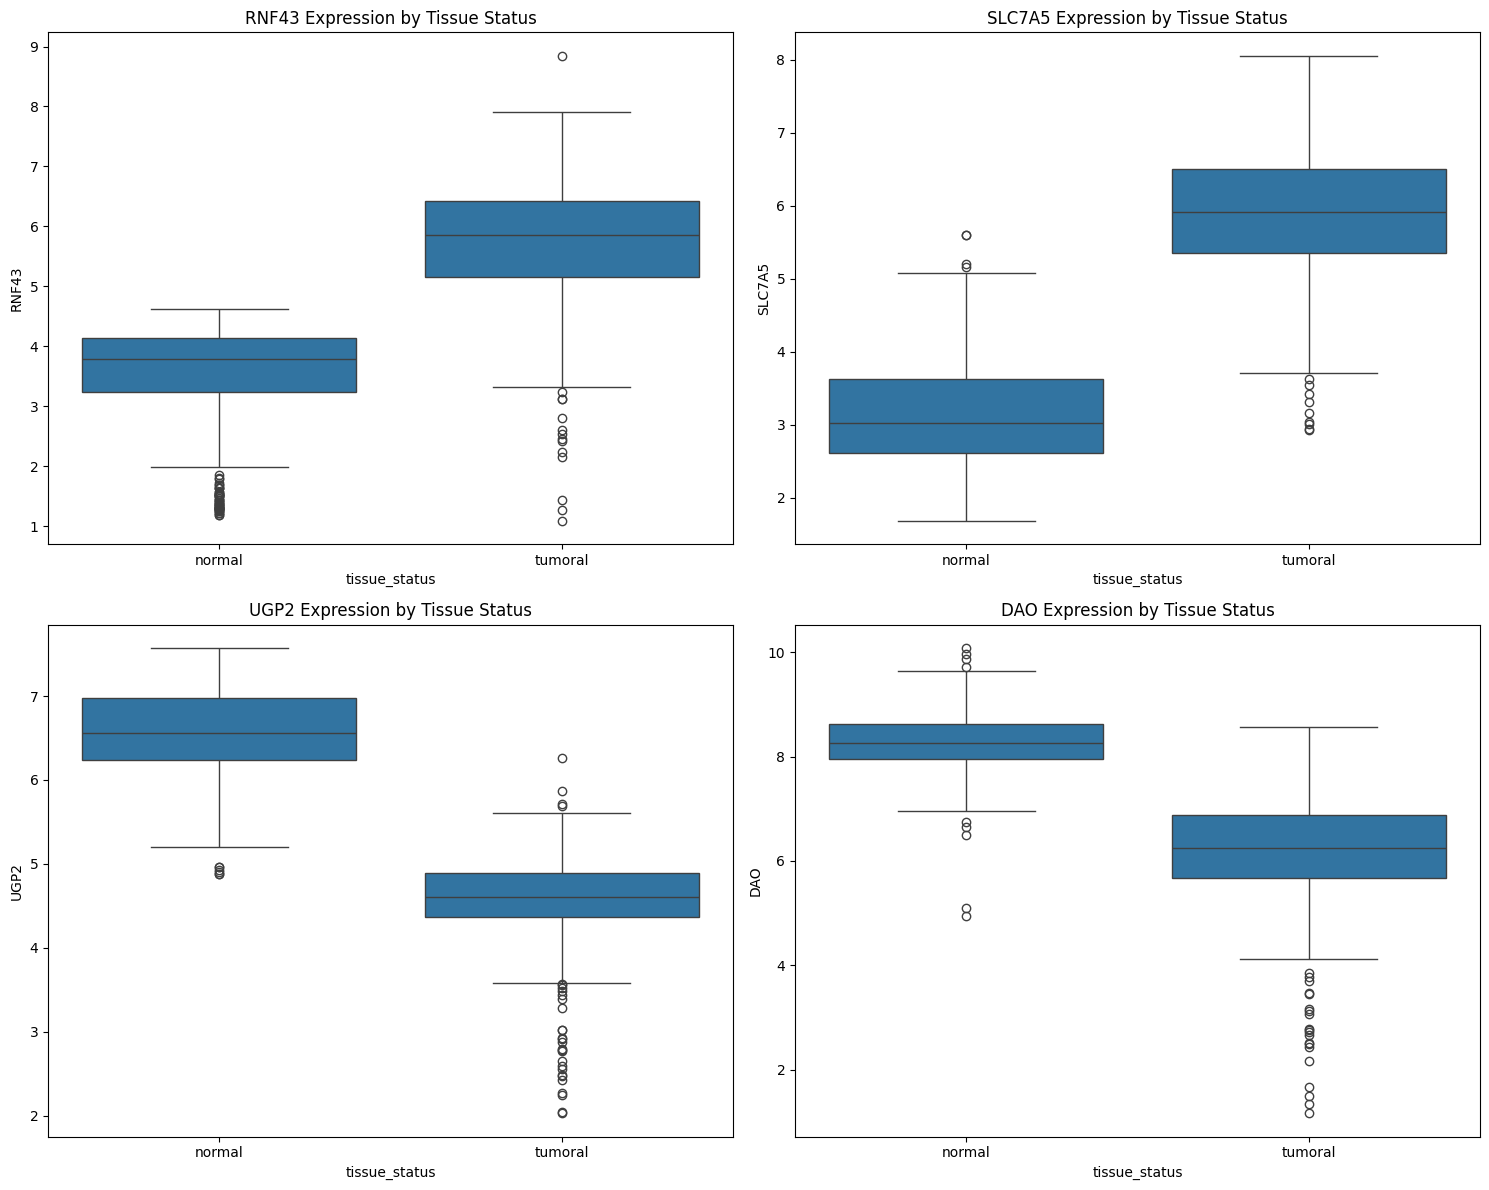

In [23]:

# Update feature selection to include all four genes
X = df[['RNF43', 'SLC7A5', 'UGP2', 'DAO']]  # Using all four genes
y = df['tissue_status']  # Target variable

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print results
print("\nLogistic Regression Results using all four genes (RNF43, SLC7A5, UGP2, DAO):")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - All Four Genes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Gene': ['RNF43', 'SLC7A5', 'UGP2', 'DAO'],
    'Coefficient': log_reg.coef_[0]
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Gene', y='Coefficient', data=feature_importance)
plt.title('Gene Importance in Prediction')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of all genes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
genes = ['RNF43', 'SLC7A5', 'UGP2', 'DAO']
for i, gene in enumerate(genes):
    sns.boxplot(x=df['tissue_status'], y=df[gene], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{gene} Expression by Tissue Status')
plt.tight_layout()
plt.show()


Logistic Regression Results using all five genes (RNF43, SLC7A5, UGP2, DAO, NEURL1B):
--------------------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



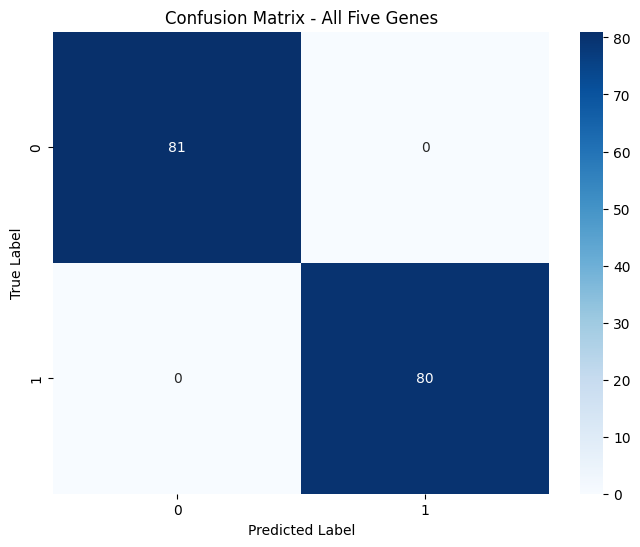

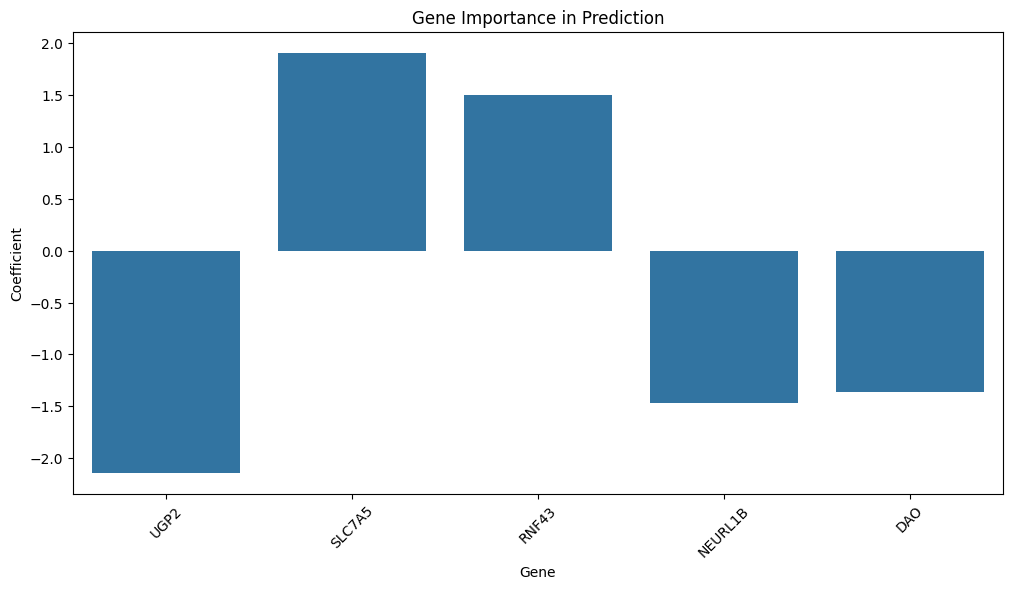

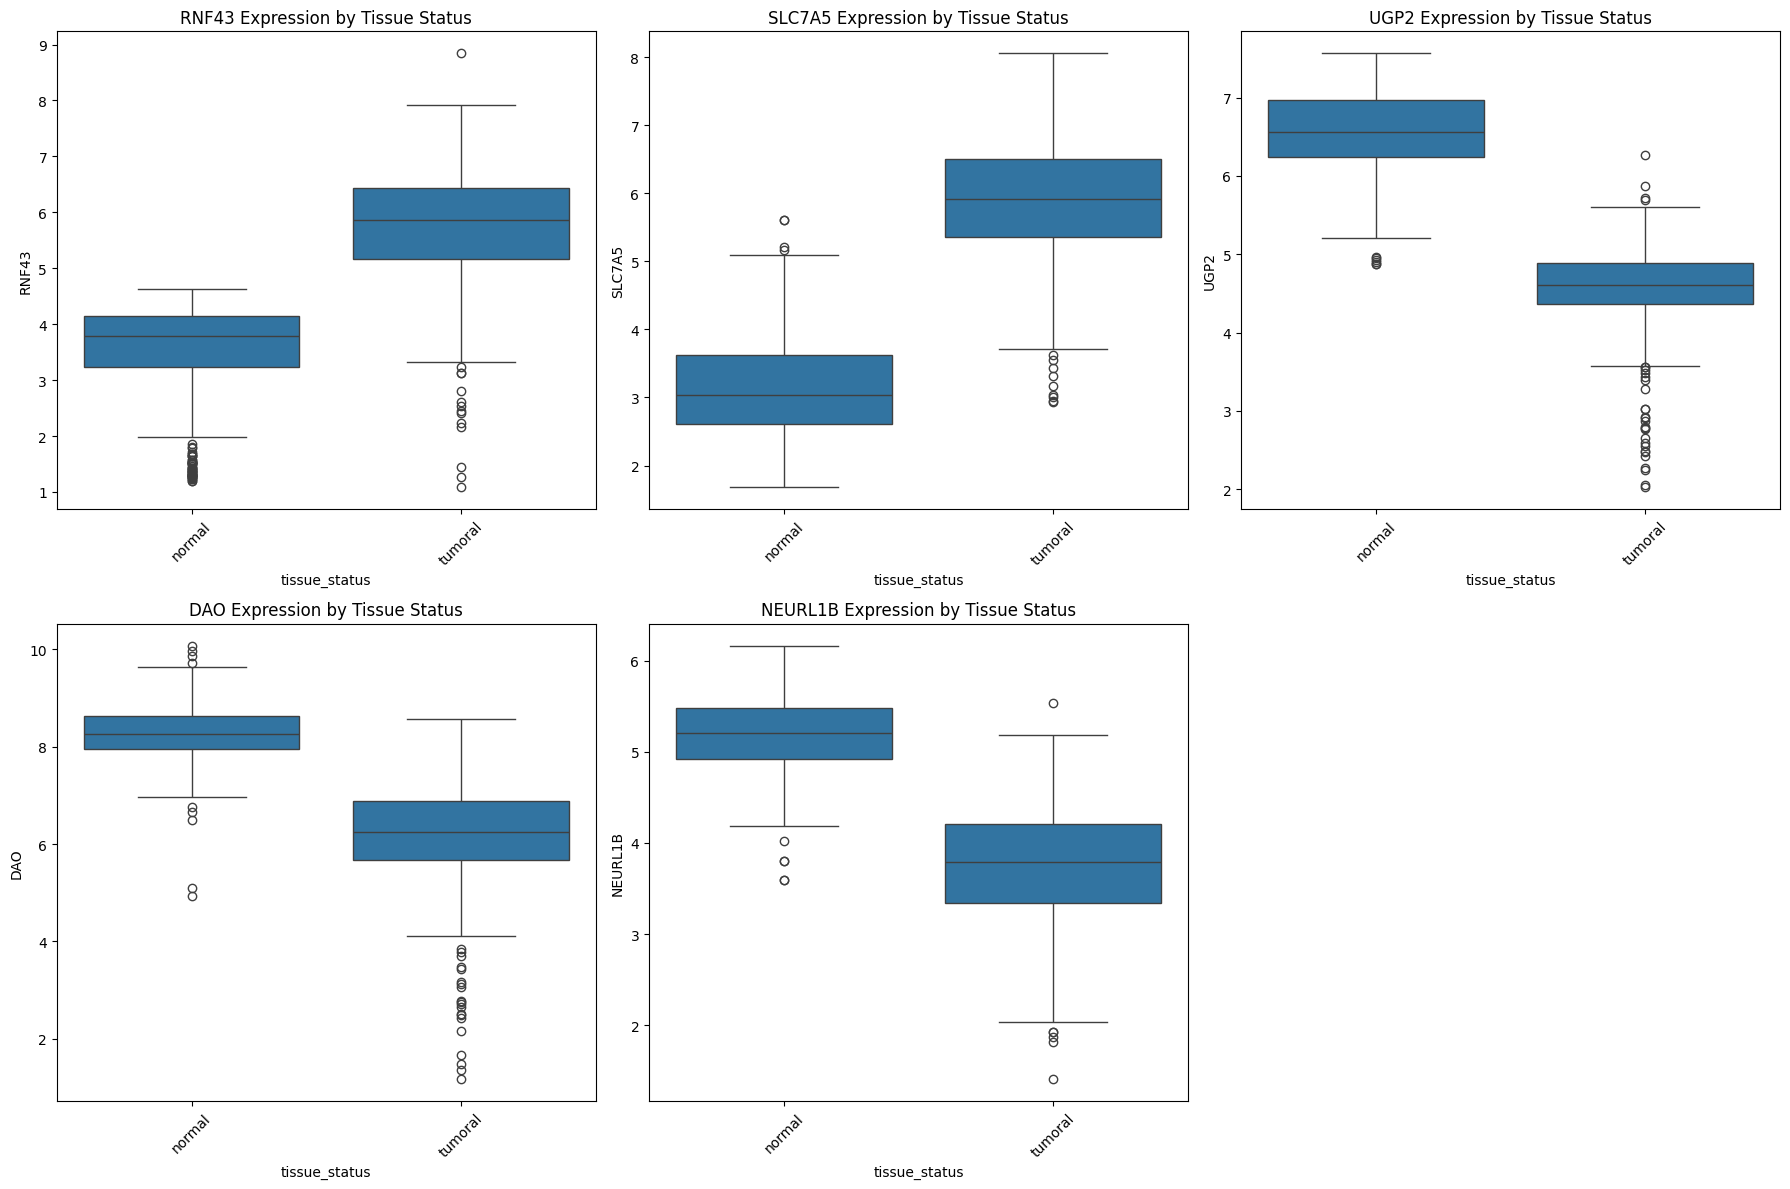

In [55]:

# Update feature selection to include all five genes
X = df[['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B']]  # Using all five genes
y = df['tissue_status']  # Target variable

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print results
print("\nLogistic Regression Results using all five genes (RNF43, SLC7A5, UGP2, DAO, NEURL1B):")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - All Five Genes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Gene': ['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B'],
    'Coefficient': log_reg.coef_[0]
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Gene', y='Coefficient', data=feature_importance)
plt.title('Gene Importance in Prediction')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of all genes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
genes = ['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B']
for i, gene in enumerate(genes):
    ax = axes[i//3, i%3] if i < 5 else axes[1, 2]
    sns.boxplot(x=df['tissue_status'], y=df[gene], ax=ax)
    ax.set_title(f'{gene} Expression by Tissue Status')
    ax.tick_params(axis='x', rotation=45)

# Remove the empty subplot
if len(genes) % 3 != 0:
    fig.delaxes(axes[1, 2])
    
plt.tight_layout()
plt.show()



Comme mentionn√© dans l'interpr√©tation de la matrice de corr√©lation pr√©c√©dente, il est possible que certains des g√®nes soient fortement corr√©l√©s entre eux. Par exemple, DAO et NEURL1B sont corr√©l√©s, ainsi que RNF43 et SLC7A5. Cela signifie que si les g√®nes sont fortement corr√©l√©s, leur pr√©sence dans le mod√®le pourrait √™tre redondante. Vous pouvez choisir d'en conserver un dans chaque paire fortement corr√©l√©e (par exemple, RNF43 au lieu de SLC7A5, ou DAO au lieu de NEURL1B) pour r√©duire la complexit√© du mod√®le sans perte de performance.

Le mod√®le de r√©gression logistique avec les cinq g√®nes (RNF43, SLC7A5, UGP2, DAO, NEURL1B) a une pr√©cision parfaite de 100% sur l'ensemble de test. Cependant, √©tant donn√© que certains g√®nes sont fortement corr√©l√©s entre eux, vous pourriez simplifier le mod√®le en supprimant un g√®ne de chaque paire fortement corr√©l√©e, sans perdre en performance. Cela pourrait rendre le mod√®le plus l√©ger et potentiellement plus robuste.

Ainsi, on peut conclure que RNF43 et SLC7A5, ainsi que DAO et NEURL1B, sont probablement les g√®nes les plus importants pour pr√©dire tissue_status, et un choix entre chaque paire serait suffisant pour maintenir la m√™me performance.


Logistic Regression Results using all six genes:
--------------------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



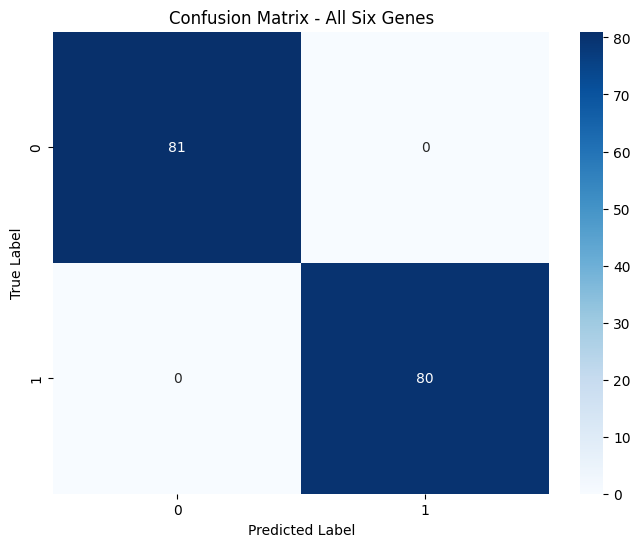

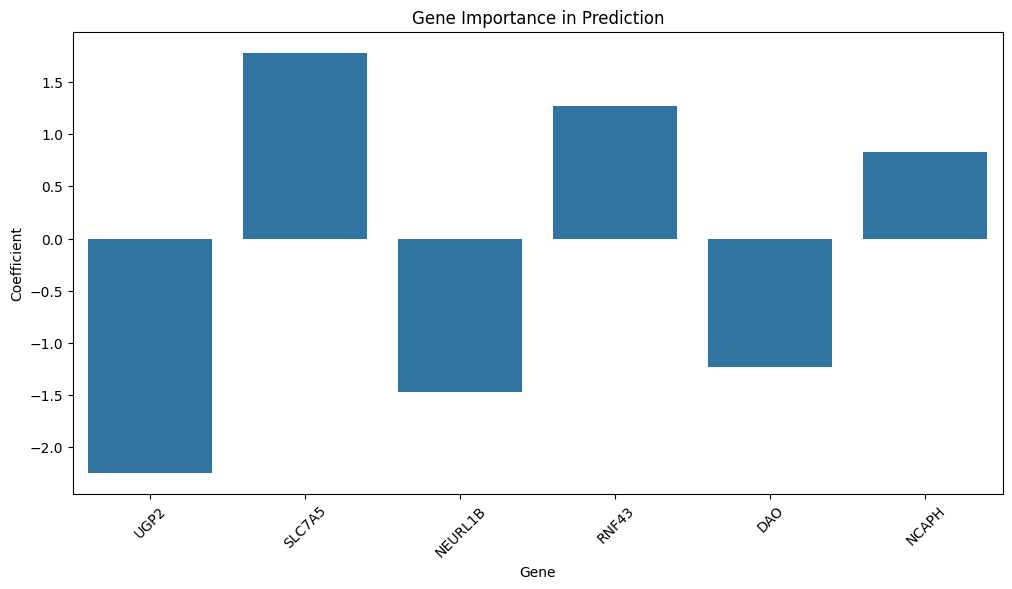

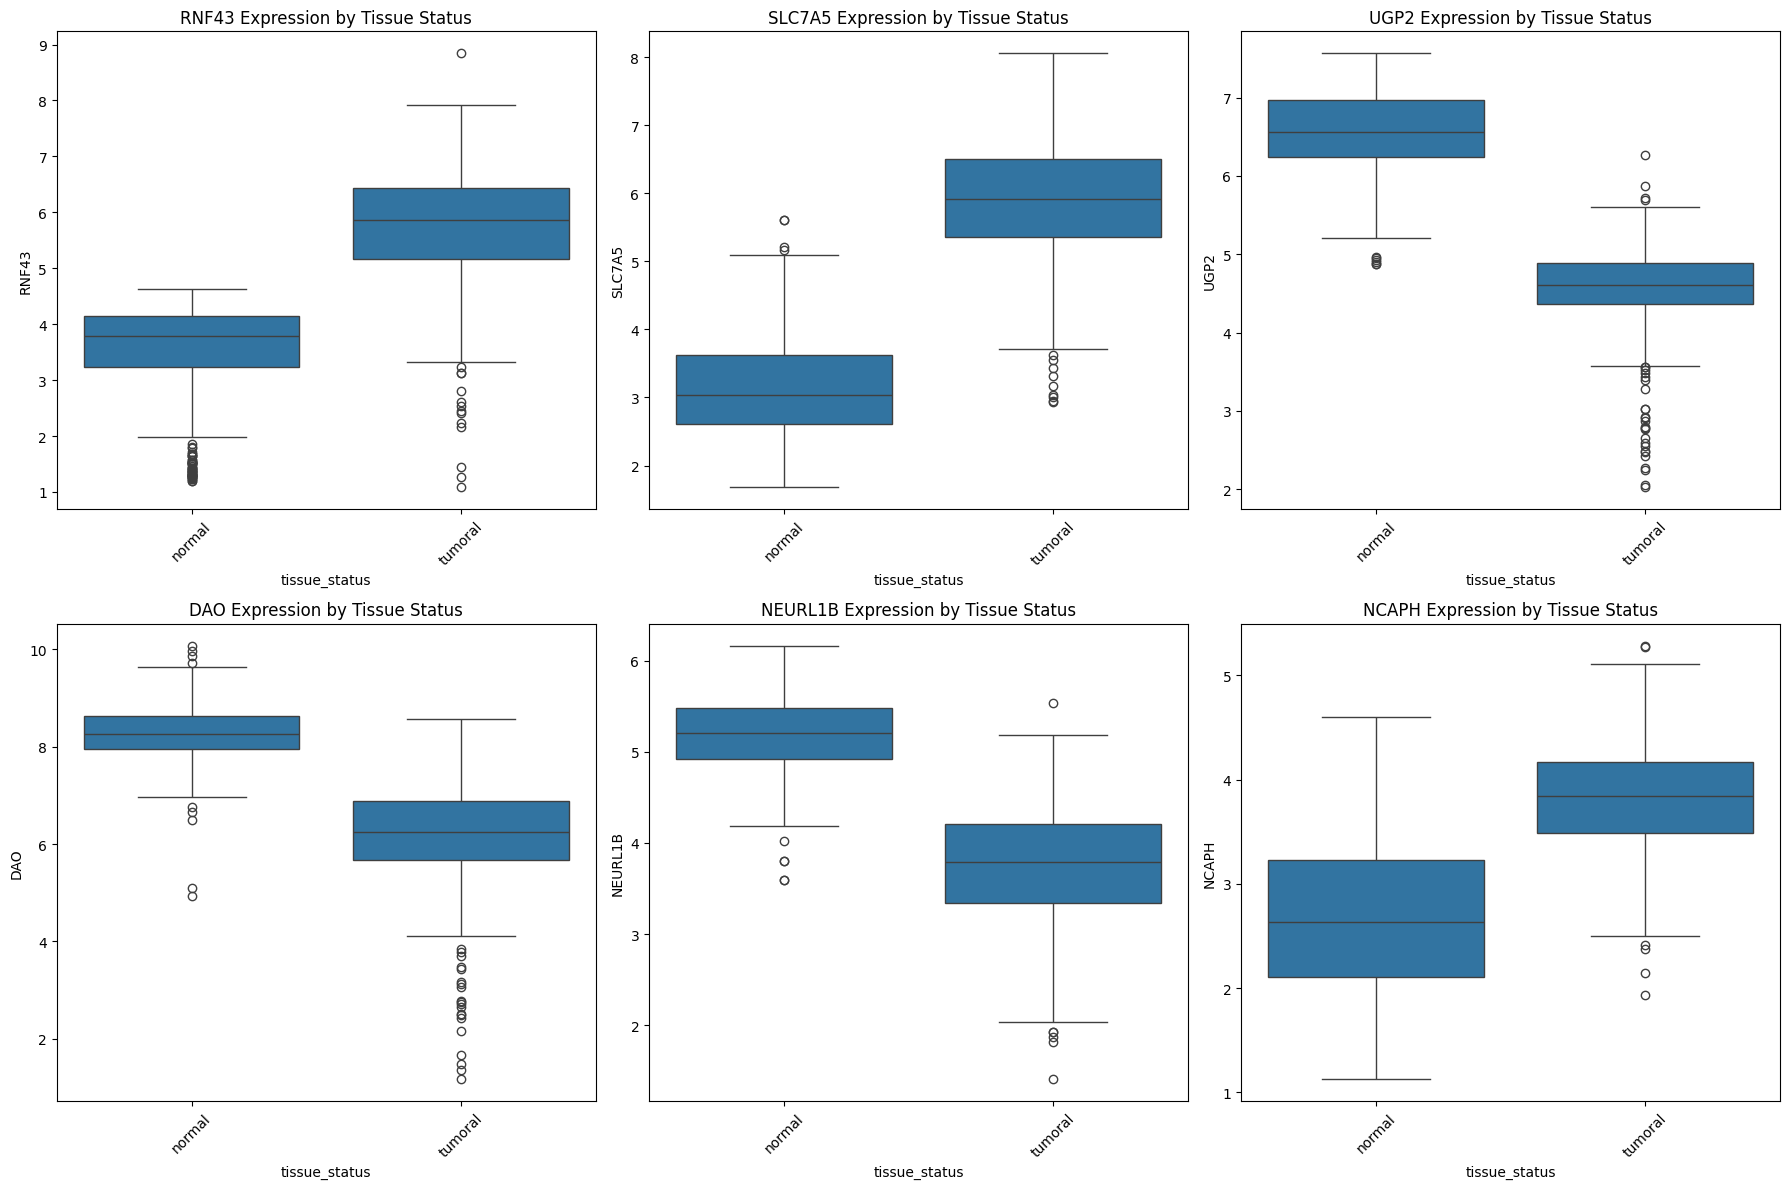

In [25]:
# Update feature selection to include all six genes
X = df[['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B', 'NCAPH']]  # Using all six genes
y = df['tissue_status']  # Target variable

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print results
print("\nLogistic Regression Results using all six genes:")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - All Six Genes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Gene': ['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B', 'NCAPH'],
    'Coefficient': log_reg.coef_[0]
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Gene', y='Coefficient', data=feature_importance)
plt.title('Gene Importance in Prediction')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of all genes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
genes = ['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B', 'NCAPH']
for i, gene in enumerate(genes):
    ax = axes[i//3, i%3]
    sns.boxplot(x=df['tissue_status'], y=df[gene], ax=ax)
    ax.set_title(f'{gene} Expression by Tissue Status')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



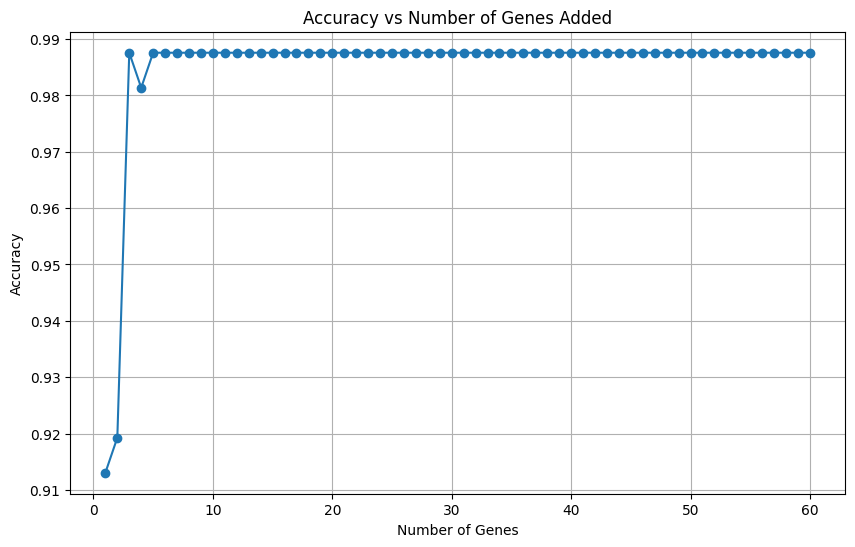

In [26]:

from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame and X, y are your features and target
X = df.drop(columns=[ "tissue_status"])
y = df["tissue_status"]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize lists to store the number of genes and corresponding accuracies
num_genes = []
accuracies = []

# Iterate over the number of genes to add
for n in range(1, X_train.shape[1] + 1):
    # Select the top n genes (you can use any feature selection method here)
    selected_genes = X_train.columns[:n]
    
    # Train a Random Forest classifier on the selected genes
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train[selected_genes], y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test[selected_genes])
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the number of genes and accuracy to the lists
    num_genes.append(n)
    accuracies.append(accuracy)

# Plot the accuracy vs number of genes
plt.figure(figsize=(10, 6))
plt.plot(num_genes, accuracies, marker='o')
plt.xlabel('Number of Genes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Genes Added')
plt.grid(True)
plt.show()

√Ä mesure que l'on ajoute plus de g√®nes, la performance du mod√®le s'am√©liore jusqu'√† atteindre un plateau √† 99% de pr√©cision avec 5 g√®nes.

Apr√®s 5 g√®nes, l'ajout de plus de caract√©ristiques n'am√©liore pas la pr√©cision, ce qui signifie que ces 5 g√®nes contiennent d√©j√† toute l'information pertinente pour la classification de tissue_status.

Cela indique que l'ajout de g√®nes suppl√©mentaires n'apporte pas d'informations nouvelles et peut m√™me potentiellement ajouter du bruit au mod√®le.

En pratique, cela signifie que vous pouvez construire un mod√®le plus simple et efficace en ne s√©lectionnant que ces 5 g√®nes, au lieu d'utiliser toutes les caract√©ristiques.


Matrice de corr√©lation entre les g√®nes s√©lectionn√©s :

           RNF43    SLC7A5      UGP2       DAO
RNF43   1.000000  0.642110 -0.614690 -0.441998
SLC7A5  0.642110  1.000000 -0.777432 -0.613886
UGP2   -0.614690 -0.777432  1.000000  0.676845
DAO    -0.441998 -0.613886  0.676845  1.000000


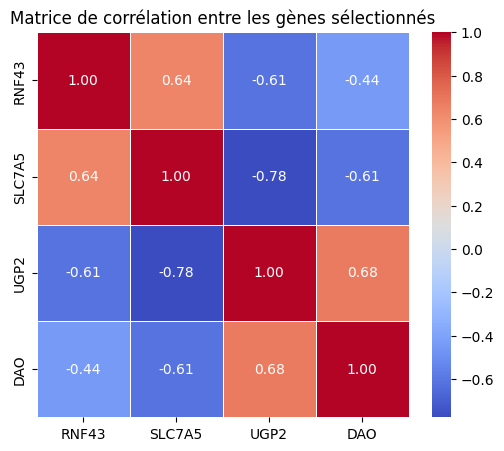

In [38]:
# S√©lection des g√®nes
genes = ['RNF43', 'SLC7A5', 'UGP2', 'DAO']

# Calcul de la matrice de corr√©lation
correlation_matrix = df[genes].corr()

# Affichage de la matrice
print("\nMatrice de corr√©lation entre les g√®nes s√©lectionn√©s :\n")
print(correlation_matrix)
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corr√©lation entre les g√®nes s√©lectionn√©s")
plt.show()



Logistic Regression Results using all five genes (RNF43,UGP2):
--------------------------------------------
Accuracy: 0.9814

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        81
           1       0.98      0.99      0.98        80

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



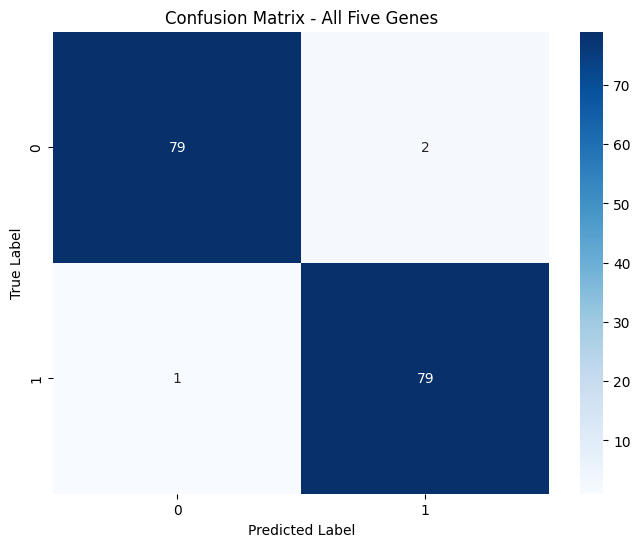

In [57]:

# Update feature selection to include all five genes
X = df[['RNF43', 'UGP2']]  # Using all five genes
y = df['tissue_status']  # Target variable

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print results
print("\nLogistic Regression Results using all five genes (RNF43,UGP2):")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - All Five Genes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



## KNN

Meilleur k: 1 avec une pr√©cision de 1.0000

k-Nearest Neighbors (k-NN) Results:
------------------------------------
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



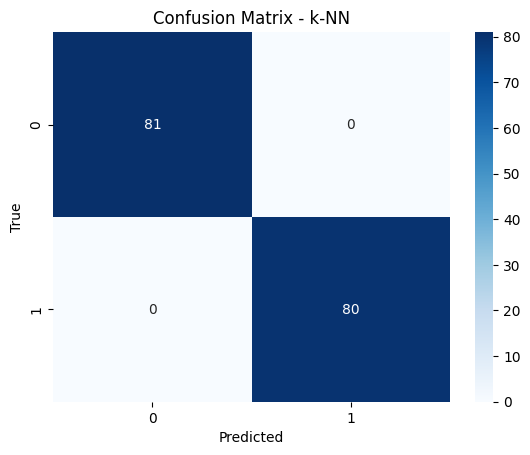

In [41]:
from sklearn.neighbors import KNeighborsClassifier
# S√©paration des features et de la variable cible
X = df.drop(columns=['tissue_status'])
y = df['tissue_status'].map({'normal': 0, 'tumoral': 1})

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_k = 0
best_score = 0

for k in range(1, 21):  # Tester k entre 1 et 20
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    score = knn_model.score(X_test_scaled, y_test)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Meilleur k: {best_k} avec une pr√©cision de {best_score:.4f}")

# Entra√Æner avec le meilleur k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("\nk-Nearest Neighbors (k-NN) Results:")
print("------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - k-NN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Meilleur k: 3 avec une pr√©cision de 0.9752

k-Nearest Neighbors (k-NN) Results:
------------------------------------
Accuracy: 0.9752
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        81
           1       0.96      0.99      0.98        80

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



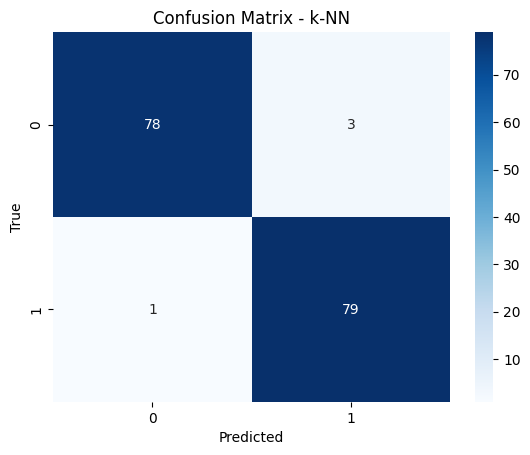

In [44]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['RNF43', 'DAO']]  
y = df['tissue_status'] 

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_k = 0
best_score = 0

for k in range(1, 21):  # Tester k entre 1 et 20
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    score = knn_model.score(X_test_scaled, y_test)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Meilleur k: {best_k} avec une pr√©cision de {best_score:.4f}")

# Entra√Æner avec le meilleur k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("\nk-Nearest Neighbors (k-NN) Results:")
print("------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - k-NN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## SVM


Support Vector Machine (SVM) Results:
--------------------------------------
Accuracy: 0.9689
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.97      0.96      0.97        80

    accuracy                           0.97       161
   macro avg       0.97      0.97      0.97       161
weighted avg       0.97      0.97      0.97       161



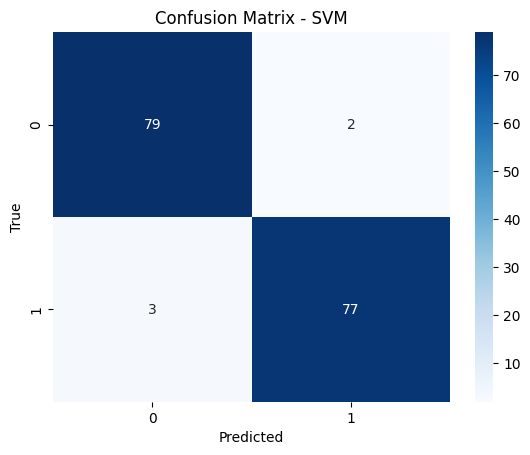

In [45]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("\nSupport Vector Machine (SVM) Results:")
print("--------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


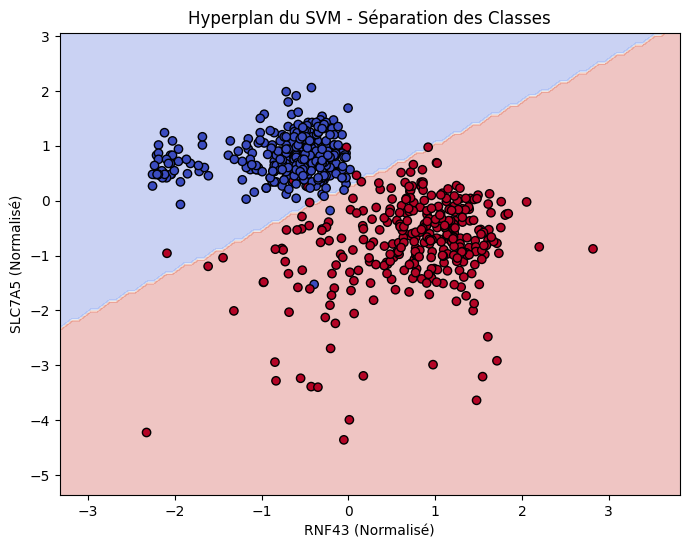

In [46]:
# Cr√©ation d'un maillage pour la visualisation de l'hyperplan
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Pr√©diction sur tout le maillage
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage du contour de la d√©cision
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap="coolwarm", edgecolors="k")
plt.xlabel("RNF43 (Normalis√©)")
plt.ylabel("SLC7A5 (Normalis√©)")
plt.title("Hyperplan du SVM - S√©paration des Classes")
plt.show()


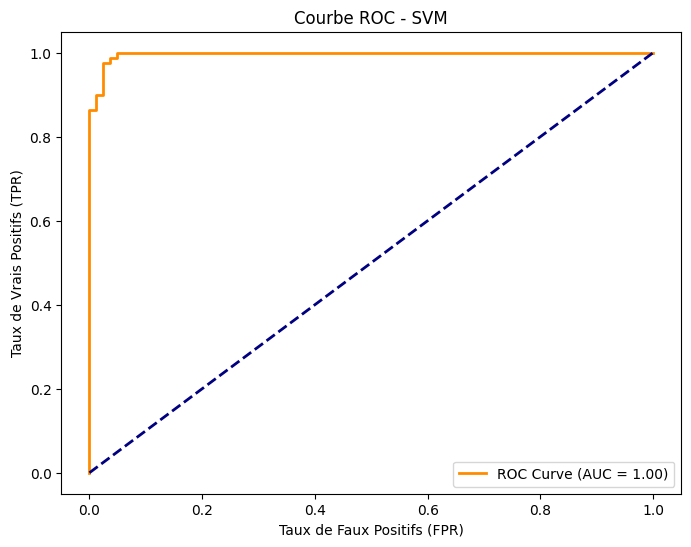

In [49]:
from sklearn.metrics import roc_curve, auc

# Probabilit√©s de pr√©diction pour la classe positive
y_prob_svm = svm_model.decision_function(X_test_scaled)

# Calcul des valeurs pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

# Trac√© de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - SVM")
plt.legend(loc="lower right")
plt.show()


## Arbre de D√©cision

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# S√©paration des features et de la variable cible
X = df.drop(columns=['tissue_status'])
y = df['tissue_status'].map({'normal': 0, 'tumoral': 1})

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# D√©finition de la grille des hyperparam√®tres
param_grid = {
    "max_depth": range(1, 21),  # Tester les profondeurs de 1 √† 20
    "criterion": ["entropy"]  # Utilisation du crit√®re d'entropie
}

# Initialisation du mod√®le
tree_model = DecisionTreeClassifier(random_state=42)

# GridSearchCV pour trouver la meilleure profondeur
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleur mod√®le
best_depth = grid_search.best_params_["max_depth"]
best_tree = grid_search.best_estimator_

print(f"Meilleure profondeur trouv√©e : {best_depth}")
print(f"Meilleur score d'accuracy en validation crois√©e : {grid_search.best_score_:.4f}")


Meilleure profondeur trouv√©e : 3
Meilleur score d'accuracy en validation crois√©e : 0.9814


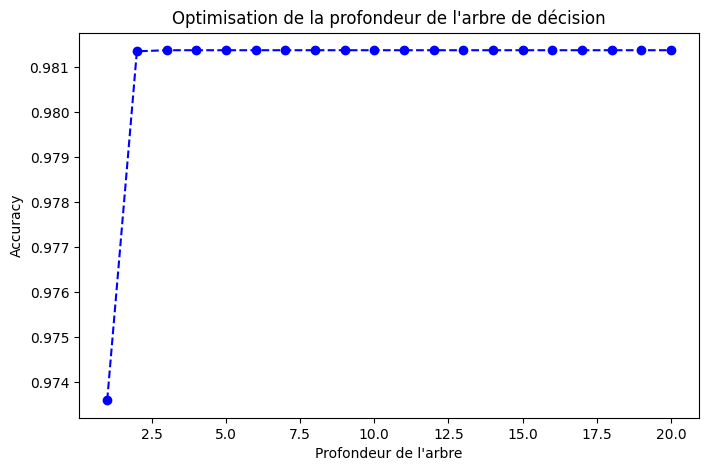

In [63]:
# Extraire les scores pour chaque profondeur test√©e
depths = param_grid["max_depth"]
accuracy_scores = grid_search.cv_results_["mean_test_score"]

# Trac√© de l'√©volution de l'accuracy
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracy_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel("Profondeur de l'arbre")
plt.ylabel("Accuracy")
plt.title("Optimisation de la profondeur de l'arbre de d√©cision")
plt.show()



Arbre de D√©cision Optimis√© (Crit√®re : Entropie) :
Accuracy: 0.9814
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.96      1.00      0.98        80

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



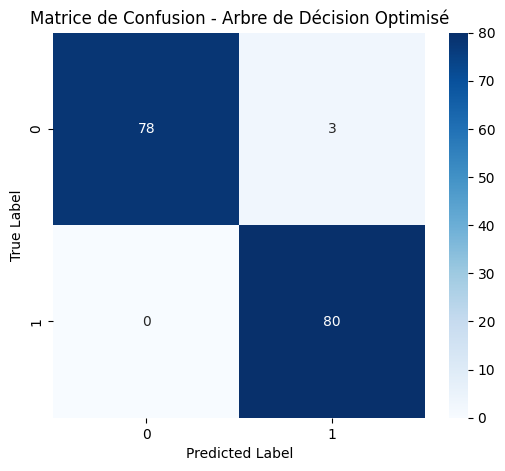

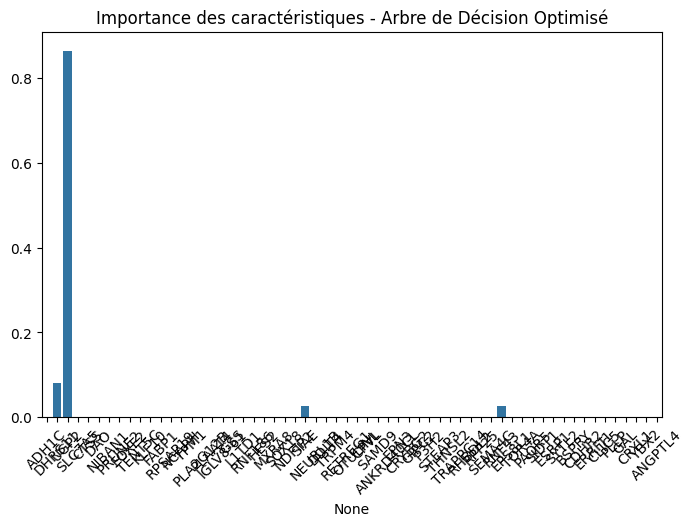

In [64]:
# Pr√©dictions avec l'arbre optimis√©
y_pred_best_tree = best_tree.predict(X_test)

print("\nArbre de D√©cision Optimis√© (Crit√®re : Entropie) :")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_tree):.4f}")
print(classification_report(y_test, y_pred_best_tree))

# üîπ Matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best_tree), annot=True, cmap='Blues', fmt='d')
plt.title("Matrice de Confusion - Arbre de D√©cision Optimis√©")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# üîπ Importance des caract√©ristiques
plt.figure(figsize=(8, 5))
sns.barplot(x=X.columns, y=best_tree.feature_importances_)
plt.xticks(rotation=45)
plt.title("Importance des caract√©ristiques - Arbre de D√©cision Optimis√©")
plt.show()


## For√™t Al√©atoire Comparaison des mod√®les

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# D√©finition de la grille des hyperparam√®tres
param_grid = {
    "n_estimators": [50, 100, 200, 300],  # Nombre d'arbres
    "max_depth": [5, 10, 15, None],  # Profondeur maximale
    "criterion": ["entropy"],  # Utilisation de l'entropie comme crit√®re de division
}

# Initialisation du mod√®le
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV pour trouver les meilleurs hyperparam√®tres
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Meilleur mod√®le
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

print(f"Meilleurs hyperparam√®tres trouv√©s : {best_params_rf}")
print(f"Meilleur score d'accuracy en validation crois√©e : {grid_search_rf.best_score_:.4f}")


Meilleurs hyperparam√®tres trouv√©s : {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50}
Meilleur score d'accuracy en validation crois√©e : 0.9969


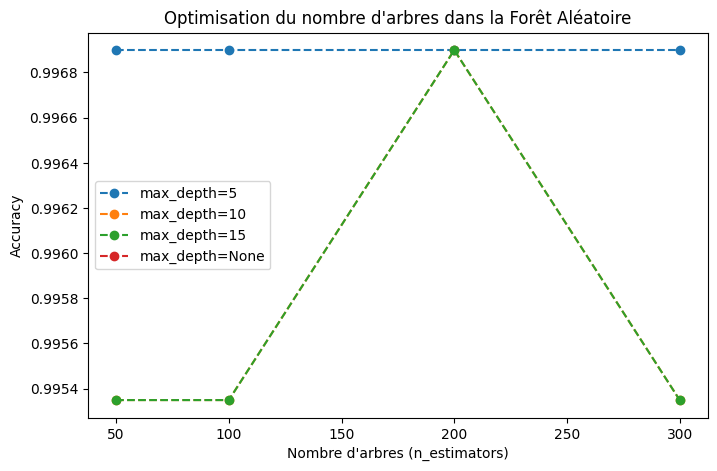

In [66]:
# Extraction des r√©sultats pour chaque combinaison test√©e
results_df = pd.DataFrame(grid_search_rf.cv_results_)

# Trac√© de l'accuracy pour diff√©rents `n_estimators`
plt.figure(figsize=(8, 5))
for depth in param_grid["max_depth"]:
    subset = results_df[results_df["param_max_depth"] == depth]
    plt.plot(subset["param_n_estimators"], subset["mean_test_score"], marker="o", linestyle="dashed", label=f"max_depth={depth}")

plt.xlabel("Nombre d'arbres (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Optimisation du nombre d'arbres dans la For√™t Al√©atoire")
plt.legend()
plt.show()



For√™t Al√©atoire Optimis√©e (Crit√®re : Entropie) :
Accuracy: 0.9876
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.98      1.00      0.99        80

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



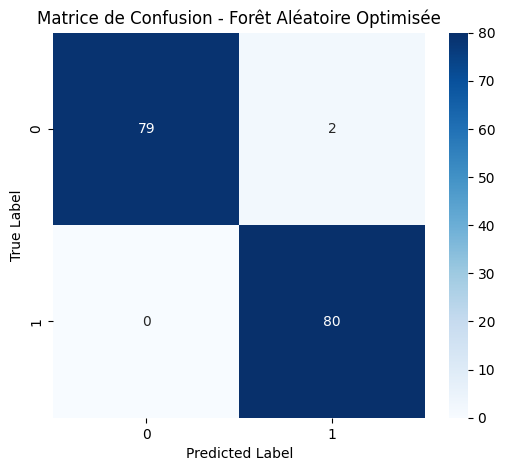

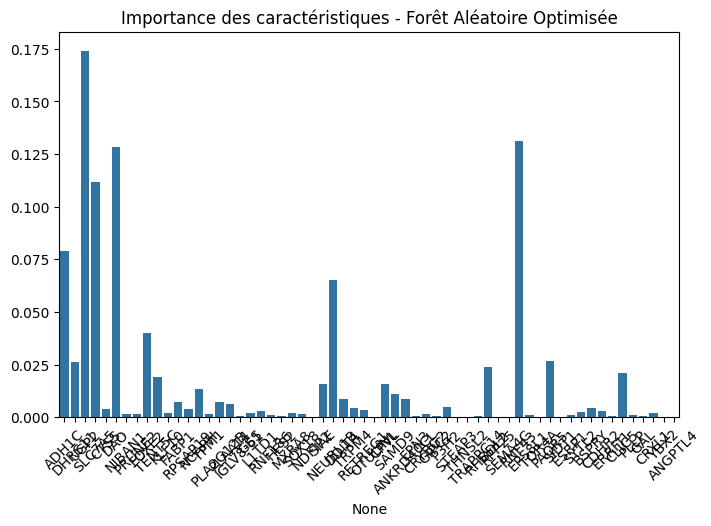

In [67]:
# Pr√©dictions avec le mod√®le optimis√©
y_pred_best_rf = best_rf.predict(X_test)

print("\nFor√™t Al√©atoire Optimis√©e (Crit√®re : Entropie) :")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(classification_report(y_test, y_pred_best_rf))

# üîπ Matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, cmap='Blues', fmt='d')
plt.title("Matrice de Confusion - For√™t Al√©atoire Optimis√©e")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# üîπ Importance des caract√©ristiques
plt.figure(figsize=(8, 5))
sns.barplot(x=X.columns, y=best_rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Importance des caract√©ristiques - For√™t Al√©atoire Optimis√©e")
plt.show()


##  Comparaison des mod√®les

In [71]:
results = pd.DataFrame({
    "Mod√®le": ["R√©gression Logistique", "SVM", "k-NN", "Arbre de D√©cision", "For√™t Al√©atoire"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_best_tree),
        accuracy_score(y_test, y_pred_best_rf)
    ]
})

print(results.sort_values(by="Accuracy", ascending=False))


                  Mod√®le  Accuracy
4        For√™t Al√©atoire  0.987578
0  R√©gression Logistique  0.981366
3      Arbre de D√©cision  0.981366
2                   k-NN  0.975155
1                    SVM  0.968944


## Cas pratique

In [72]:
patient = [[4.68, 4.10, 7.59]]

# Pr√©dire avec chaque mod√®le
print("Pr√©diction Logistique :", log_reg.predict(patient))
print("Pr√©diction SVM :", svm_model.predict(patient))
print("Pr√©diction k-NN :", knn_best.predict(patient))
print("Pr√©diction Arbre de d√©cision :", dt.predict(patient))
print("Pr√©diction For√™t al√©atoire :", rf.predict(patient))


ValueError: X has 3 features, but LogisticRegression is expecting 2 features as input.